In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

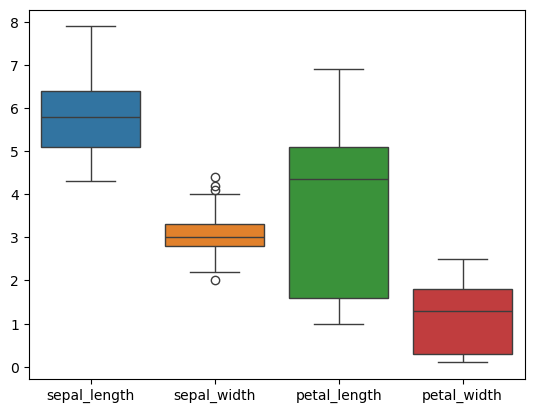

In [5]:
sns.boxplot(data)

In [6]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
X = data.drop('species', axis=1)
y = data['species']

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [10]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
y_labeled = le.fit_transform(y)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_labeled, test_size=0.3, random_state=10)

In [20]:
dtc  = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train2, y_train2)
pred = dtc.predict(X_test2)
print(classification_report(y_test2, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [27]:
y = pd.get_dummies(y)

In [28]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

# Sequential

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], ))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                60        
                                                                 
 dense_5 (Dense)             (None, 6)                 78        
                                                                 
 dense_6 (Dense)             (None, 3)                 21        
                                                                 
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)

Epoch 1/100
15/21 [====================>.........] - ETA: 0s - loss: 1.1335 - accuracy: 0.2800

2024-09-09 17:04:05.670911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 17ms/step - loss: 1.1217 - accuracy: 0.3333 - val_loss: 1.1006 - val_accuracy: 0.4000
Epoch 2/100
14/21 [===================>..........] - ETA: 0s - loss: 1.1102 - accuracy: 0.3857

2024-09-09 17:04:06.029722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 11ms/step - loss: 1.1099 - accuracy: 0.4000 - val_loss: 1.0936 - val_accuracy: 0.6667
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 1.0938 - accuracy: 0.6286 - val_loss: 1.0726 - val_accuracy: 0.6889
Epoch 4/100
21/21 [==============================] - 0s 11ms/step - loss: 1.0659 - accuracy: 0.6571 - val_loss: 1.0470 - val_accuracy: 0.6889
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 1.0404 - accuracy: 0.6571 - val_loss: 1.0234 - val_accuracy: 0.6889
Epoch 6/100
21/21 [==============================] - 0s 11ms/step - loss: 1.0038 - accuracy: 0.6476 - val_loss: 0.9890 - val_accuracy: 0.6889
Epoch 7/100
21/21 [==============================] - 0s 11ms/step - loss: 0.9674 - accuracy: 0.6095 - val_loss: 0.9585 - val_accuracy: 0.6444
Epoch 8/100
21/21 [==============================] - 0s 13ms/step - loss: 0.9329 - accuracy: 0.6095 - val_loss: 0.9332 - val_accuracy: 0.6889
Epoch 9/100
21/21 

21/21 [==============================] - 0s 11ms/step - loss: 0.1892 - accuracy: 0.9524 - val_loss: 0.1802 - val_accuracy: 0.9778
Epoch 60/100
21/21 [==============================] - 0s 12ms/step - loss: 0.1840 - accuracy: 0.9619 - val_loss: 0.1848 - val_accuracy: 0.9556
Epoch 61/100
21/21 [==============================] - 0s 12ms/step - loss: 0.1776 - accuracy: 0.9714 - val_loss: 0.1748 - val_accuracy: 0.9778
Epoch 62/100
21/21 [==============================] - 0s 11ms/step - loss: 0.1746 - accuracy: 0.9714 - val_loss: 0.1708 - val_accuracy: 0.9778
Epoch 63/100
21/21 [==============================] - 0s 10ms/step - loss: 0.1721 - accuracy: 0.9619 - val_loss: 0.1666 - val_accuracy: 0.9778
Epoch 64/100
21/21 [==============================] - 0s 10ms/step - loss: 0.1677 - accuracy: 0.9714 - val_loss: 0.1679 - val_accuracy: 0.9556
Epoch 65/100
21/21 [==============================] - 0s 11ms/step - loss: 0.1642 - accuracy: 0.9714 - val_loss: 0.1605 - val_accuracy: 0.9778
Epoch 66/100

2024-09-09 17:04:29.200415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:04:29.224687: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:04:29.224760: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 17:04:29.228538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:04:29.228649: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

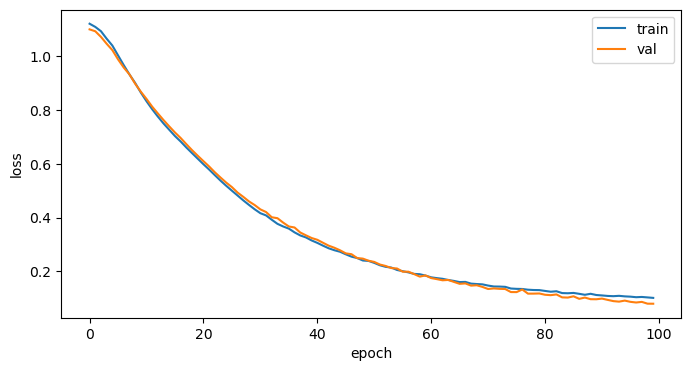

In [34]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 함수형

In [39]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [42]:
X_train.shape

(105, 4)

In [43]:
X_train.shape[1]

4

In [44]:
inputs = Input(shape=(X_train.shape[1], ))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

In [45]:
model = Model(inputs, x)
model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 3)                 27        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train, y_train, epochs=400, batch_size=150, validation_data=(X_test, y_test))

Epoch 1/400
1/1 [==============================] - ETA: 0s - loss: 1.1530 - accuracy: 0.3429

2024-09-09 17:22:34.403509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:22:34.445324: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:22:34.445404: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 17:22:34.596828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 469ms/step - loss: 1.1530 - accuracy: 0.3429 - val_loss: 1.1566 - val_accuracy: 0.3111
Epoch 2/400
1/1 [==============================] - 0s 43ms/step - loss: 1.1495 - accuracy: 0.3429 - val_loss: 1.1532 - val_accuracy: 0.3111
Epoch 3/400
1/1 [==============================] - 0s 45ms/step - loss: 1.1461 - accuracy: 0.3429 - val_loss: 1.1500 - val_accuracy: 0.3111
Epoch 4/400
1/1 [==============================] - 0s 45ms/step - loss: 1.1428 - accuracy: 0.3429 - val_loss: 1.1468 - val_accuracy: 0.3111
Epoch 5/400
1/1 [==============================] - ETA: 0s - loss: 1.1396 - accuracy: 0.3429

2024-09-09 17:22:34.621544: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:22:34.621669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 48ms/step - loss: 1.1396 - accuracy: 0.3429 - val_loss: 1.1437 - val_accuracy: 0.3111
Epoch 6/400
1/1 [==============================] - 0s 48ms/step - loss: 1.1365 - accuracy: 0.3429 - val_loss: 1.1406 - val_accuracy: 0.3111
Epoch 7/400
1/1 [==============================] - 0s 46ms/step - loss: 1.1335 - accuracy: 0.3429 - val_loss: 1.1376 - val_accuracy: 0.3111
Epoch 8/400
1/1 [==============================] - 0s 49ms/step - loss: 1.1305 - accuracy: 0.3429 - val_loss: 1.1347 - val_accuracy: 0.3111
Epoch 9/400
1/1 [==============================] - 0s 47ms/step - loss: 1.1275 - accuracy: 0.3429 - val_loss: 1.1318 - val_accuracy: 0.2889
Epoch 10/400
1/1 [==============================] - 0s 45ms/step - loss: 1.1245 - accuracy: 0.3429 - val_loss: 1.1289 - val_accuracy: 0.2889
Epoch 11/400
1/1 [==============================] - 0s 47ms/step - loss: 1.1216 - accuracy: 0.3429 - val_loss: 1.1260 - val_accuracy: 0.2889
Epoch 12/400
1/1 [============

1/1 [==============================] - 0s 44ms/step - loss: 0.9998 - accuracy: 0.6857 - val_loss: 1.0112 - val_accuracy: 0.6222
Epoch 64/400
1/1 [==============================] - 0s 46ms/step - loss: 0.9979 - accuracy: 0.6857 - val_loss: 1.0095 - val_accuracy: 0.6222
Epoch 65/400
1/1 [==============================] - 0s 46ms/step - loss: 0.9961 - accuracy: 0.6857 - val_loss: 1.0079 - val_accuracy: 0.6222
Epoch 66/400
1/1 [==============================] - 0s 48ms/step - loss: 0.9942 - accuracy: 0.6857 - val_loss: 1.0062 - val_accuracy: 0.6222
Epoch 67/400
1/1 [==============================] - 0s 46ms/step - loss: 0.9923 - accuracy: 0.6857 - val_loss: 1.0045 - val_accuracy: 0.6222
Epoch 68/400
1/1 [==============================] - 0s 48ms/step - loss: 0.9904 - accuracy: 0.6857 - val_loss: 1.0028 - val_accuracy: 0.6000
Epoch 69/400
1/1 [==============================] - 0s 48ms/step - loss: 0.9885 - accuracy: 0.6857 - val_loss: 1.0010 - val_accuracy: 0.6000
Epoch 70/400
1/1 [========

1/1 [==============================] - 0s 49ms/step - loss: 0.8623 - accuracy: 0.5524 - val_loss: 0.8811 - val_accuracy: 0.5333
Epoch 122/400
1/1 [==============================] - 0s 49ms/step - loss: 0.8596 - accuracy: 0.5524 - val_loss: 0.8785 - val_accuracy: 0.5333
Epoch 123/400
1/1 [==============================] - 0s 47ms/step - loss: 0.8568 - accuracy: 0.5524 - val_loss: 0.8759 - val_accuracy: 0.5333
Epoch 124/400
1/1 [==============================] - 0s 44ms/step - loss: 0.8541 - accuracy: 0.5524 - val_loss: 0.8734 - val_accuracy: 0.5333
Epoch 125/400
1/1 [==============================] - 0s 52ms/step - loss: 0.8513 - accuracy: 0.5524 - val_loss: 0.8708 - val_accuracy: 0.5333
Epoch 126/400
1/1 [==============================] - 0s 45ms/step - loss: 0.8486 - accuracy: 0.5524 - val_loss: 0.8682 - val_accuracy: 0.5333
Epoch 127/400
1/1 [==============================] - 0s 45ms/step - loss: 0.8458 - accuracy: 0.5524 - val_loss: 0.8656 - val_accuracy: 0.5333
Epoch 128/400
1/1 [=

Epoch 179/400
1/1 [==============================] - 0s 45ms/step - loss: 0.6990 - accuracy: 0.6857 - val_loss: 0.7278 - val_accuracy: 0.6222
Epoch 180/400
1/1 [==============================] - 0s 46ms/step - loss: 0.6963 - accuracy: 0.6857 - val_loss: 0.7253 - val_accuracy: 0.6222
Epoch 181/400
1/1 [==============================] - 0s 46ms/step - loss: 0.6936 - accuracy: 0.6857 - val_loss: 0.7228 - val_accuracy: 0.6222
Epoch 182/400
1/1 [==============================] - 0s 45ms/step - loss: 0.6909 - accuracy: 0.6857 - val_loss: 0.7203 - val_accuracy: 0.6222
Epoch 183/400
1/1 [==============================] - 0s 45ms/step - loss: 0.6882 - accuracy: 0.6857 - val_loss: 0.7178 - val_accuracy: 0.6222
Epoch 184/400
1/1 [==============================] - 0s 47ms/step - loss: 0.6856 - accuracy: 0.6857 - val_loss: 0.7153 - val_accuracy: 0.6222
Epoch 185/400
1/1 [==============================] - 0s 43ms/step - loss: 0.6829 - accuracy: 0.6857 - val_loss: 0.7128 - val_accuracy: 0.6222
Epoch 

Epoch 237/400
1/1 [==============================] - 0s 46ms/step - loss: 0.5679 - accuracy: 0.6857 - val_loss: 0.6043 - val_accuracy: 0.6222
Epoch 238/400
1/1 [==============================] - 0s 45ms/step - loss: 0.5662 - accuracy: 0.6857 - val_loss: 0.6026 - val_accuracy: 0.6222
Epoch 239/400
1/1 [==============================] - 0s 46ms/step - loss: 0.5645 - accuracy: 0.6857 - val_loss: 0.6010 - val_accuracy: 0.6222
Epoch 240/400
1/1 [==============================] - 0s 47ms/step - loss: 0.5628 - accuracy: 0.6857 - val_loss: 0.5994 - val_accuracy: 0.6222
Epoch 241/400
1/1 [==============================] - 0s 43ms/step - loss: 0.5611 - accuracy: 0.6857 - val_loss: 0.5977 - val_accuracy: 0.6222
Epoch 242/400
1/1 [==============================] - 0s 46ms/step - loss: 0.5594 - accuracy: 0.6857 - val_loss: 0.5961 - val_accuracy: 0.6222
Epoch 243/400
1/1 [==============================] - 0s 44ms/step - loss: 0.5578 - accuracy: 0.6857 - val_loss: 0.5945 - val_accuracy: 0.6222
Epoch 

Epoch 295/400
1/1 [==============================] - 0s 69ms/step - loss: 0.4906 - accuracy: 0.7048 - val_loss: 0.5274 - val_accuracy: 0.6222
Epoch 296/400
1/1 [==============================] - 0s 44ms/step - loss: 0.4896 - accuracy: 0.7048 - val_loss: 0.5263 - val_accuracy: 0.6222
Epoch 297/400
1/1 [==============================] - 0s 48ms/step - loss: 0.4885 - accuracy: 0.7048 - val_loss: 0.5253 - val_accuracy: 0.6222
Epoch 298/400
1/1 [==============================] - 0s 51ms/step - loss: 0.4875 - accuracy: 0.7048 - val_loss: 0.5242 - val_accuracy: 0.6222
Epoch 299/400
1/1 [==============================] - 0s 52ms/step - loss: 0.4865 - accuracy: 0.7048 - val_loss: 0.5232 - val_accuracy: 0.6222
Epoch 300/400
1/1 [==============================] - 0s 55ms/step - loss: 0.4855 - accuracy: 0.7048 - val_loss: 0.5221 - val_accuracy: 0.6222
Epoch 301/400
1/1 [==============================] - 0s 64ms/step - loss: 0.4845 - accuracy: 0.7048 - val_loss: 0.5210 - val_accuracy: 0.6222
Epoch 

Epoch 353/400
1/1 [==============================] - 0s 46ms/step - loss: 0.4371 - accuracy: 0.8095 - val_loss: 0.4694 - val_accuracy: 0.7111
Epoch 354/400
1/1 [==============================] - 0s 47ms/step - loss: 0.4362 - accuracy: 0.8095 - val_loss: 0.4685 - val_accuracy: 0.7111
Epoch 355/400
1/1 [==============================] - 0s 47ms/step - loss: 0.4354 - accuracy: 0.8095 - val_loss: 0.4675 - val_accuracy: 0.7111
Epoch 356/400
1/1 [==============================] - 0s 44ms/step - loss: 0.4345 - accuracy: 0.8095 - val_loss: 0.4665 - val_accuracy: 0.7111
Epoch 357/400
1/1 [==============================] - 0s 46ms/step - loss: 0.4336 - accuracy: 0.8095 - val_loss: 0.4656 - val_accuracy: 0.7111
Epoch 358/400
1/1 [==============================] - 0s 45ms/step - loss: 0.4328 - accuracy: 0.8095 - val_loss: 0.4646 - val_accuracy: 0.7111
Epoch 359/400
1/1 [==============================] - 0s 42ms/step - loss: 0.4319 - accuracy: 0.8095 - val_loss: 0.4636 - val_accuracy: 0.7111
Epoch 

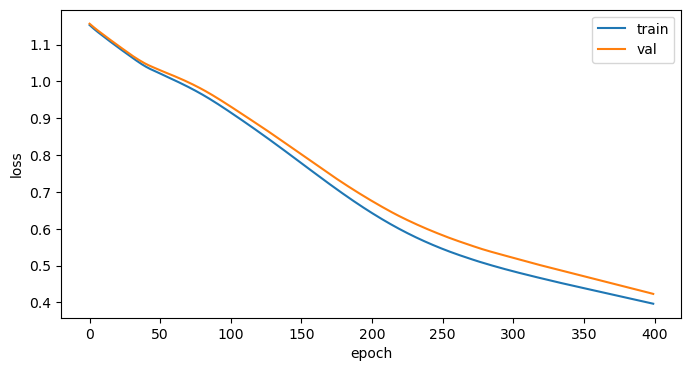

In [47]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 클래스형

In [48]:
import tensorflow as tf

In [50]:
class Iris(Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(8, activation='relu')
        self.classifier = Dense(3, activation='softmax')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.classifier(x)

In [52]:
model = Iris()
model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 1.1415 - accuracy: 0.3143

2024-09-09 17:29:32.654742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:29:32.697336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 17:29:32.697395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 17:29:32.827905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 17:29:32.851206: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to

1/1 [==============================] - 0s 468ms/step - loss: 1.1415 - accuracy: 0.3143 - val_loss: 1.0971 - val_accuracy: 0.3778
Epoch 2/200
1/1 [==============================] - 0s 41ms/step - loss: 1.1375 - accuracy: 0.3143 - val_loss: 1.0944 - val_accuracy: 0.3778
Epoch 3/200
1/1 [==============================] - 0s 46ms/step - loss: 1.1335 - accuracy: 0.3143 - val_loss: 1.0919 - val_accuracy: 0.3778
Epoch 4/200
1/1 [==============================] - 0s 45ms/step - loss: 1.1297 - accuracy: 0.3143 - val_loss: 1.0894 - val_accuracy: 0.3778
Epoch 5/200
1/1 [==============================] - 0s 45ms/step - loss: 1.1259 - accuracy: 0.3143 - val_loss: 1.0869 - val_accuracy: 0.3778
Epoch 6/200
1/1 [==============================] - 0s 44ms/step - loss: 1.1222 - accuracy: 0.3143 - val_loss: 1.0845 - val_accuracy: 0.3778
Epoch 7/200
1/1 [==============================] - 0s 44ms/step - loss: 1.1186 - accuracy: 0.3143 - val_loss: 1.0821 - val_accuracy: 0.3778
Epoch 8/200
1/1 [==============

1/1 [==============================] - 0s 43ms/step - loss: 1.0059 - accuracy: 0.6286 - val_loss: 1.0049 - val_accuracy: 0.6889
Epoch 60/200
1/1 [==============================] - 0s 63ms/step - loss: 1.0042 - accuracy: 0.6286 - val_loss: 1.0033 - val_accuracy: 0.6889
Epoch 61/200
1/1 [==============================] - 0s 42ms/step - loss: 1.0024 - accuracy: 0.6286 - val_loss: 1.0017 - val_accuracy: 0.6889
Epoch 62/200
1/1 [==============================] - 0s 50ms/step - loss: 1.0007 - accuracy: 0.6286 - val_loss: 1.0000 - val_accuracy: 0.6667
Epoch 63/200
1/1 [==============================] - 0s 46ms/step - loss: 0.9989 - accuracy: 0.6286 - val_loss: 0.9984 - val_accuracy: 0.6667
Epoch 64/200
1/1 [==============================] - 0s 46ms/step - loss: 0.9971 - accuracy: 0.6286 - val_loss: 0.9967 - val_accuracy: 0.6667
Epoch 65/200
1/1 [==============================] - 0s 48ms/step - loss: 0.9953 - accuracy: 0.6286 - val_loss: 0.9950 - val_accuracy: 0.6667
Epoch 66/200
1/1 [========

1/1 [==============================] - 0s 47ms/step - loss: 0.8711 - accuracy: 0.6381 - val_loss: 0.8780 - val_accuracy: 0.6889
Epoch 118/200
1/1 [==============================] - 0s 46ms/step - loss: 0.8679 - accuracy: 0.6381 - val_loss: 0.8751 - val_accuracy: 0.6889
Epoch 119/200
1/1 [==============================] - 0s 50ms/step - loss: 0.8647 - accuracy: 0.6381 - val_loss: 0.8721 - val_accuracy: 0.6889
Epoch 120/200
1/1 [==============================] - 0s 47ms/step - loss: 0.8615 - accuracy: 0.6381 - val_loss: 0.8691 - val_accuracy: 0.6889
Epoch 121/200
1/1 [==============================] - 0s 48ms/step - loss: 0.8582 - accuracy: 0.6381 - val_loss: 0.8661 - val_accuracy: 0.6889
Epoch 122/200
1/1 [==============================] - 0s 46ms/step - loss: 0.8549 - accuracy: 0.6381 - val_loss: 0.8631 - val_accuracy: 0.6889
Epoch 123/200
1/1 [==============================] - 0s 59ms/step - loss: 0.8516 - accuracy: 0.6381 - val_loss: 0.8600 - val_accuracy: 0.6889
Epoch 124/200
1/1 [=

Epoch 175/200
1/1 [==============================] - 0s 48ms/step - loss: 0.6788 - accuracy: 0.6095 - val_loss: 0.7006 - val_accuracy: 0.6444
Epoch 176/200
1/1 [==============================] - 0s 50ms/step - loss: 0.6758 - accuracy: 0.6095 - val_loss: 0.6978 - val_accuracy: 0.6444
Epoch 177/200
1/1 [==============================] - 0s 43ms/step - loss: 0.6728 - accuracy: 0.6000 - val_loss: 0.6950 - val_accuracy: 0.6222
Epoch 178/200
1/1 [==============================] - 0s 62ms/step - loss: 0.6699 - accuracy: 0.5905 - val_loss: 0.6923 - val_accuracy: 0.6222
Epoch 179/200
1/1 [==============================] - 0s 45ms/step - loss: 0.6669 - accuracy: 0.5810 - val_loss: 0.6895 - val_accuracy: 0.6222
Epoch 180/200
1/1 [==============================] - 0s 43ms/step - loss: 0.6640 - accuracy: 0.5714 - val_loss: 0.6868 - val_accuracy: 0.6222
Epoch 181/200
1/1 [==============================] - 0s 44ms/step - loss: 0.6611 - accuracy: 0.5714 - val_loss: 0.6841 - val_accuracy: 0.6222
Epoch 

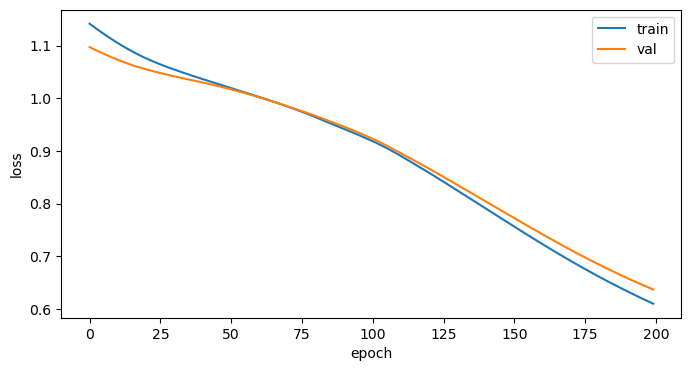

In [53]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()